<a href="https://colab.research.google.com/github/eebjwa/SENSE_GEE_TEAM3/blob/main/SENSE_2020_W1_Group_3_SE_EK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project- Group 3**

Aim: Look at land use changes by looking at changes in vegetation cover

Import API and authenticate

In [2]:
import ee
# Trigger the authentication flow.
#ee.Authenticate()

# Initialize the library.
ee.Initialize()

Load an image

*   Set the bounds of the polygons for zoomed in and zoomed out
*   filter images by year
*   List item







In [3]:
zoomed_out =  ee.Geometry.Polygon(
        [[[-74.60668900677238, 20.088333497505946],
          [-74.60668900677238, 17.687361057873034],
          [-68.11376908489738, 17.687361057873034],
          [-68.11376908489738, 20.088333497505946]]])
zoomed_in =  ee.Geometry.Polygon(
        [[[-71.7976970344606, 19.335441167371748],
          [-71.7976970344606, 19.19316176101097],
          [-71.60268971024185, 19.19316176101097],
          [-71.60268971024185, 19.335441167371748]]])

collection = ee.ImageCollection('MODIS/006/MOD44B').filterBounds(zoomed_out)
veg2019 = ee.ImageCollection('MODIS/006/MOD44B').filterBounds(zoomed_out).filterDate('2019-01-01', '2019-12-31').first()
veg2018 = ee.ImageCollection('MODIS/006/MOD44B').filterBounds(zoomed_out).filterDate('2018-01-01', '2018-12-31').first()
veg2000 = ee.ImageCollection('MODIS/006/MOD44B').filterBounds(zoomed_out).filterDate('2000-01-01', '2000-12-31').first()

In [8]:
import folium
import geehydro

In [9]:
# Use folium to visualize the imagery.
map = folium.Map(location = [18.999768, -71.374124], zoom_start=8)
map.addLayer(veg2000, {'gain':2},'2000')
map.addLayer(veg2019, {'gain':2}, '2019')
map.addLayer(veg2018, {'gain':2},'2018')
folium.LayerControl().add_to(map)
map

Time series analysis

In [11]:
print(info[0])

NameError: name 'info' is not defined

In [15]:
%matplotlib inline
from IPython.display import Image
import ee, datetime
import pandas as pd
from pylab import *
from matplotlib.pylab import rcParams


# Define point 
#point = ee.Geometry.Point(-71.8059, 19.009215)

# Get info from the point

info = collection.getRegion(zoomed_in,500).getInfo() # change colelction by series
print(info)

# Reshape image collection 
# Spearate header from data, and store data in an array
header = info[0]
data = array(info[1:])  #taking from first row to the end

# Extract time from data

iTime = header.index('time')
#creating a list of time points from 0 to final time and storing in variable time
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands 
# band in this is EVI= Enhanced vegetation index
band_list = ['Percent_Tree_Cover', 'Percent_NonTree_Vegetation']
#take the index of b for eact b in band_list
iBands = [header.index(b) for b in band_list]

#gonna take all the data for the selected band
yData = data[0:,iBands].astype(np.float)
#print(yData)

#create a variable for evi from data extracted from image and apply a factor 
ptc = yData[:,0]*0.0001 # USGS specifications: scale factor
print(ptc)

# Reshape EVI array into Pandas Dataframe
df = pd.DataFrame(data=ptc, columns=['Percent_Tree_Cover'])
#print(df)

df['Date'] = pd.Series(time, index=df.index)
#print(df)

[['id', 'longitude', 'latitude', 'time', 'Percent_Tree_Cover', 'Percent_NonTree_Vegetation', 'Percent_NonVegetated', 'Quality', 'Percent_Tree_Cover_SD', 'Percent_NonVegetated_SD', 'Cloud'], ['2000_03_05', -71.79560329504245, 19.194751833423876, 952214400000, 3, 78, 19, 0, 1057, 1057, 0], ['2001_03_06', -71.79560329504245, 19.194751833423876, 983836800000, 6, 79, 15, 0, 892, 892, 0], ['2002_03_06', -71.79560329504245, 19.194751833423876, 1015372800000, 5, 62, 33, 0, 1581, 1581, 0], ['2003_03_06', -71.79560329504245, 19.194751833423876, 1046908800000, 3, 79, 19, 0, 590, 590, 0], ['2004_03_05', -71.79560329504245, 19.194751833423876, 1078444800000, 2, 80, 18, 0, 782, 782, 0], ['2005_03_06', -71.79560329504245, 19.194751833423876, 1110067200000, 5, 79, 16, 0, 670, 670, 0], ['2006_03_06', -71.79560329504245, 19.194751833423876, 1141603200000, 5, 77, 18, 0, 723, 723, 0], ['2007_03_06', -71.79560329504245, 19.194751833423876, 1173139200000, 5, 79, 16, 0, 842, 842, 0], ['2008_03_05', -71.79560

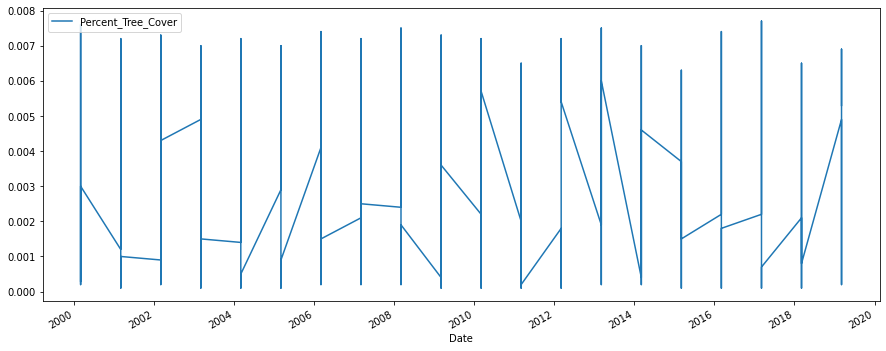

In [16]:
# Plotting

rcParams['figure.figsize'] = 15, 6
df.plot(y='Percent_Tree_Cover',x='Date')
plt.show()


# Samuel Code

In [49]:
import ee 
import geemap
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: ignored

In [ ]:
# Create a map centred at (lat, lon).
Map = geemap.Map(center=[40, -100], zoom=4)

In [ ]:
# Display the map.
Map

In [ ]:
#define the regions we're interested in, and also access landcover information derived from MODIS

haiti_region = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017') \
  .filter(ee.Filter.eq('country_na', 'Haiti'))

dr_region = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017') \
  .filter(ee.Filter.eq('country_na', 'Dominican Republic'))

# Load MODIS land cover categories in 2001.
landcover = ee.ImageCollection('MODIS/006/MCD12Q1') \
  .select('LC_Type1')

In [ ]:
#define a colour palette to view landcover data. View all on the map above

igbpLandCoverVis = {
  'min': 1.0,
  'max': 17.0,
  'palette': [
    '05450a', '086a10', '54a708', '78d203', '009900', 'c6b044', 'dcd159',
    'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44', 'a5a5a5', 'ff6d4c',
    '69fff8', 'f9ffa4', '1c0dff'
  ]
}
    
Map.addLayer(landcover, igbpLandCoverVis, 'landcover')
Map.addLayer(haiti_region, {'color':'red'}, 'haiti_region')
Map.addLayer(dr_region, {'color':'blue'}, 'dr_region')

In [ ]:
class_images = landcover.select('LC_Type1') #select the landcover band where an integer represents the class
 #(see https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MCD12Q1#description)

#empty list to store data
data = []

#go through 19 years of data
N = 19
for i in range(N):
    #access a particular year in the collection of images
    class_image = ee.Image(class_images.toList(class_images.size()).get(i))
    
    #empty array to store data
    year_data = np.zeros(18)

    #print year of image
    print(class_image.get('system:index').getInfo())
    
    #get area of pixels as a band, perform a reduction so we get the number of pixels for each class for the 
    #particular year
    image = ee.Image.pixelArea().addBands(class_image)
    sums = image.reduceRegion(**{
          'reducer': ee.Reducer.sum().group(**{
            'groupField': 1,
            'groupName': 'code',
          }),
          'geometry': haiti_region.geometry(),
          'scale': 500,
          'maxPixels': 1e8
        })
  
    #messy way of sorting the dictionary into a nicer structure
    class_year_data = sums.getInfo().get('groups')
    for class_type in class_year_data:
        year_data[class_type['code']] = class_type['sum']
                  
    data.append(year_data)

In [ ]:
#make a stack plot to show lc over time

plt.figure(figsize=(12,10))
plt.title('landcover over time for Haiti')
plt.stackplot(list(range(2001,2001+N)),np.vstack(np.array(data).T))